# 4 - bw2data - The graph in a database

In [1]:
import bw2data as bd

The first thing to learn about `bw2data` is the concept of projects. Each project is self-contained, and indepenent of other projects. This can sometimes lead to data duplication, but helps keep each project safe from the others.

Just like we odn't want to install things into the base anaconda directory, it is best practice now to use the default project. It is called `default`:

In [2]:
bd.projects.current

'default'

It has its own directory:

In [3]:
bd.projects.dir

PosixPath('/Users/cmutel/Library/Application Support/Brightway3/default.c21f969b5f03d33d43e04f8f136e7682')

Let's create a new project:

In [4]:
bd.projects.set_current("from-the-ground-up")

(concept of Brightway databases)

We can use a shortcut to install some data:

In [6]:
import bw2io as bi
bi.useeio11()

Unzipping file
Importing data
Applying strategy: json_ld_allocate_datasets
Applying strategy: json_ld_get_normalized_exchange_locations
Applying strategy: json_ld_convert_unit_to_reference_unit
Applying strategy: json_ld_get_activities_list_from_rawdata
Applying strategy: json_ld_add_products_as_activities
Applying strategy: json_ld_get_normalized_exchange_units
Applying strategy: json_ld_add_activity_unit
Applying strategy: json_ld_rename_metadata_fields
Applying strategy: json_ld_location_name
Applying strategy: json_ld_remove_fields
Applying strategy: json_ld_fix_process_type
Applying strategy: json_ld_label_exchange_type
Applying strategy: json_ld_prepare_exchange_fields_for_linking
Applying strategy: add_database_name
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
Applying strategy: normalize_units
Applied 17 strategies in 1.36 seconds
Moved 1873 biosphere flows to `self.data`


Writing activities to SQLite3 database:


2649 datasets
162926 exchanges
0 unlinked exchanges
  


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:14


Title: Writing activities to SQLite3 database:
  Started: 10/17/2021 18:24:55
  Finished: 10/17/2021 18:25:10
  Total time elapsed: 00:00:14
  CPU %: 83.00
  Memory %: 3.69
Created database: US EEIO 1.1
Applying strategy: json_ld_lcia_add_method_metadata
Applying strategy: json_ld_lcia_convert_to_list
Applying strategy: json_ld_lcia_set_method_metadata
Applying strategy: json_ld_lcia_reformat_cfs_as_exchanges
Applying strategy: normalize_units
Applied 5 strategies in 0.01 seconds
19 methods
4511 cfs
0 unlinked cfs
Wrote 19 LCIA methods with 4511 characterization factors


In [5]:
bd.databases

Databases dictionary with 1 object(s):
	US EEIO 1.1

In [9]:
db = bd.Database("US EEIO 1.1")
len(db)

2649

In [10]:
{node['type'] for node in db}

{'emission', 'process', 'product'}

In [ ]:
sorted({node['name'] for node in db})

* list comprehensions
* db.search()

In [12]:
bd.methods

Methods dictionary with 19 object(s):
	('Impact Potential', 'ACID')
	('Impact Potential', 'ETOX')
	('Impact Potential', 'EUTR')
	('Impact Potential', 'GCC')
	('Impact Potential', 'HC')
	('Impact Potential', 'HNC')
	('Impact Potential', 'HRSP')
	('Impact Potential', 'HTOX')
	('Impact Potential', 'OZON')
	('Impact Potential', 'SMOG')
	('Releases', 'HAPS')
	('Releases', 'METL')
	('Releases', 'PEST')
	('Resource Use', 'ENRG')
	('Resource Use', 'LAND')
	('Resource Use', 'MINE')
	('Resource Use', 'NREN')
	('Resource Use', 'REN')
	('Resource Use', 'WATR')

In [13]:
for activity_key, cf_amount in bd.Method(('Impact Potential', 'GCC')).load():
    print(bd.get_activity(activity_key), cf_amount)

'methane, dichloro-, hcc-30' (, None, ('air', 'unspecified')) 8.7
'Methane, dibromo-' (, None, ('air', 'unspecified')) 1.54
'Propane, perfluoro-' (, None, ('air', 'unspecified')) 8830.0
'methane, chlorodifluoro-, hcfc-22' (, None, ('air', 'unspecified')) 1810.0
'Butane, perfluorocyclo-, PFC-318' (, None, ('air', 'unspecified')) 10300.0
'Ethane, pentafluoro-, HFC-125' (, None, ('air', 'unspecified')) 3500.0
'HALON 1301' (, None, ('air', 'unspecified')) 7140.0
'Ethane, 1,1,1-trifluoro-, HFC-143a' (, None, ('air', 'unspecified')) 4470.0
'Methane, tetrafluoro-, R-14' (, None, ('air', 'unspecified')) 7390.0
'HALON 1211' (, None, ('air', 'unspecified')) 1890.0
'Ethane, 1,1-dichloro-1-fluoro-, HCFC-141b' (, None, ('air', 'unspecified')) 725.0
'Methane, trichlorofluoro-, CFC-11' (, None, ('air', 'unspecified')) 4750.0
'HCFC-225ca' (, None, ('air', 'unspecified')) 122.0
'1,1,1-trichloroethane' (, None, ('air', 'unspecified')) 146.0
'chloroform' (, None, ('air', 'unspecified')) 31.0
'Methane, br

What are these "keys"?

## Interacting with the graph

In [14]:
moo = next(obj for obj in db if obj['name'] == 'Cattle ranches and feedlots' and obj['type'] == 'product')
moo

'Cattle ranches and feedlots' (, United States, ('11: Agriculture, Forestry, Fishing and Hunting', '1121: Cattle Ranching and Farming'))

In [15]:
type(moo) == bd.Node

True

In [17]:
moo['categories'], moo['location'], moo['unit']

(('11: Agriculture, Forestry, Fishing and Hunting',
  '1121: Cattle Ranching and Farming'),
 'United States',
 '')

In [19]:
for edge in moo.exchanges():
    print(edge)

In [20]:
import bw2calc as bc

In [21]:
lca = bc.LCA({moo: 1}, ('Impact Potential', 'GCC'))
lca.lci()
lca.lcia()
lca.score

4.678528235935018

In [22]:
lca.technosphere_matrix

<388x388 sparse matrix of type '<class 'numpy.float64'>'
	with 73104 stored elements in Compressed Sparse Row format>

In [23]:
lca.biosphere_matrix

<1871x388 sparse matrix of type '<class 'numpy.float64'>'
	with 89480 stored elements in Compressed Sparse Row format>

Contribution

Let's show a little bit of what Brightway can do. We can compare the correlation of LCA scores across a variety of categories.

There is an atuomatic way to do this in Brightway, but we can also program it manually to see how it works.

Stop for a bit and think about what one would need to calculate LCA scores for 380 products and ~10 impact categories.

In [24]:
products_in_order = [obj for obj in db if obj['type'] == 'product']
categories_in_order = [method for method in bd.methods if method[0] == 'Impact Potential']

In [25]:
import numpy as np

results = np.zeros((len(products_in_order), len(categories_in_order)))

def get_lcia_scores(products, categories, results):
    lca = bc.LCA({products[0]: 1}, categories[0])
    lca.lci()
    lca.lcia()
    
    method_matrices = [lca.characterization_matrix.copy()]
    
    for other_method in categories[1:]:
        lca.switch_method(other_method)
        method_matrices.append(lca.characterization_matrix.copy())
    
    for i, product in enumerate(products):
        lca.redo_lci({product.id: 1})
        for j, characterization_matrix in enumerate(method_matrices):
            results[i, j] = (characterization_matrix * lca.inventory).sum()
    
    return results

In [26]:
from time import time

start = time()
results = get_lcia_scores(products_in_order, categories_in_order, results)
print(time() - start)

2.0787811279296875


In [38]:
from scipy import stats

def create_correlation_matrix(scores_array):
    num_methods = scores_array.shape[1]
    correlations = np.zeros((num_methods, num_methods))

    for row in range(num_methods):
        for col in range(num_methods):
            if col <= row:
                continue                               # Only need to compute correlation once
            dataset_1 = scores_array[:, row]
            dataset_2 = scores_array[:, col]
            mask = (dataset_1 != 0) * (dataset_2 != 0) # Ignore activities that have zero score
            corr = stats.kendalltau( # Get tau value, drop p-statistic
                dataset_1[mask], 
                dataset_2[mask]
            )[0]
            if np.isnan(corr):
                correlations[row, col] = 0
            else:
                correlations[row, col] = corr

    correlations = correlations + correlations.T       # Make sorting easier by adding filling in lower left triangle
    return correlations

In [39]:
correlation_matrix = create_correlation_matrix(results)

In [40]:
%matplotlib inline

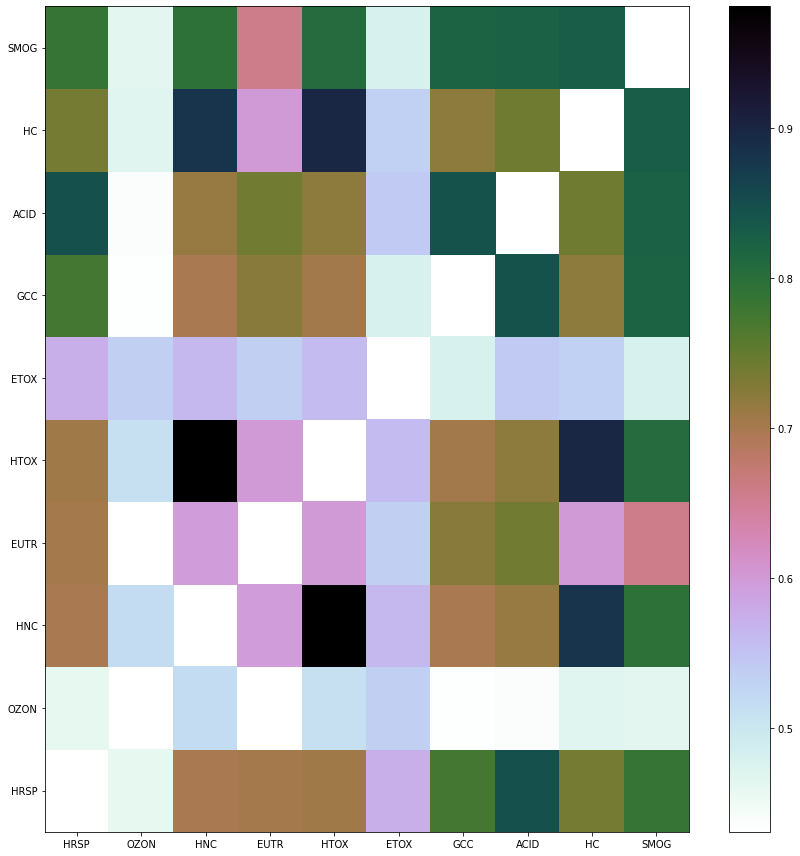

In [48]:
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(12, 12)

masked_correlation = np.ma.array(correlation_matrix, mask=correlation_matrix == 0).T
plt.pcolor(masked_correlation, cmap=plt.cm.cubehelix_r)
plt.colorbar()
plt.ylim(None, correlation_matrix.shape[1])
plt.xlim(None, correlation_matrix.shape[0])
plt.xticks(np.arange(0.5, 10), [obj[1] for obj in categories_in_order])
plt.yticks(np.arange(0.5, 10), [obj[1] for obj in categories_in_order])
plt.tight_layout()

In [49]:
for category in categories_in_order:
    print(category[1], bd.methods[category]['description'])

HRSP Human Health - Respiratory Effects
These indicators provide estimates of stress or potential impacts on specific environmental and human health aspects. The indicators in this category applied here are from TRACI 2.1 (Bare 2012). See the dataset 'USEEIO v1.1 - Elementary Flows and Life Cycle Impact Assessment (LCIA) Characterization Factors' for details, DOI: 10.23719/1368541
OZON Ozone Depletion
These indicators provide estimates of stress or potential impacts on specific environmental and human health aspects. The indicators in this category applied here are from TRACI 2.1 (Bare 2012). See the dataset 'USEEIO v1.1 - Elementary Flows and Life Cycle Impact Assessment (LCIA) Characterization Factors' for details, DOI: 10.23719/1368541
HNC Human Health Noncancer
These indicators provide estimates of stress or potential impacts on specific environmental and human health aspects. The indicators in this category applied here are from TRACI 2.1 (Bare 2012). See the dataset 'USEEIO v1.1 